# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

In [23]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')


In [19]:
# number of callbacks for black-sounding names
w=sum(data[data.race=='w'].call)
b=sum(data[data.race=='b'].call)
print('white callbacks: ',w)
print('black callbacks: ',b)
print('rate of white callbacks: ',w/len(data[data.race=='w']))
print('rate of black callbacks: ',b/len(data[data.race=='b']))
print('probably of total success: ',(b+w)/len(data))


('white callbacks: ', 235.0)
('black callbacks: ', 157.0)
('rate of white callbacks: ', 0.096509240246406572)
('rate of black callbacks: ', 0.064476386036960986)
('probably of total success: ', 0.080492813141683772)


In [39]:
data.head()


,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


CLT Conditions
Randomization - each sample should represent a random sample from population, or at least the population distribution.
As stated above the 'b' and 'w' race values were assigned randomly. Randomization is met.

10% Rule - the sample size must not be bigger than 10% of the entire population.
The estimated size of the US population is 325.7 million, so 10% is 32.7 million.  We have 4870 data points, so this condition is met.

Large Enough Sample Size - Sample size n should be large enough so that np>=10 and nq>=10.
Both probablities of success for blacks and whites are greater than 10 as well as the probabilities of failure.  This condition is met.

We should use the z-Test because we have a high sample size and the distribution is normal.

rate_w = the percentage of callbacks for white sounding names
rate_b = the percentage of callbacks for black sounding names

The null hypothesis (H0) : rate_w - rate_b = 0
The alternate hypothesis (HA) : rate_w - rate_b != 0


                       CB  No CB  Total % Success
White-sounding names  235   2200   2435     9.65%
Black-sounding names  157   2278   2435     6.45%
Aggregate             392   4478   4870     8.05%
Callback rate difference: 0.0320328542094

BOOTSTRAP RESULTS
p-value: 0.0
95% conf. int.: [-0.01478439  0.01519507]
margin of error: 0.00389844723663


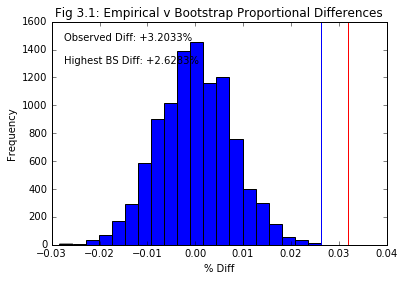

In [71]:
#Compute margin of error, confidence interval, and p-value. 
# bootstrapping
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
# Your solution to Q3 here

np.random.seed(42)



data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

w = data[data.race=='w']
b = data[data.race=='b']

# white-sounding names
w_r = np.sum(w.call)
w_n = len(w)
w_p = (w_r / w_n)

# black-sounding names
b_r = np.sum(b.call)
b_n = len(b)
b_p = (b_r / b_n)

# aggregate values
r = np.sum(data.call)
n = len(data)
p = r/n

tabledata = {'CB': np.array([w_r, b_r, r]).astype(int),
        'No CB': np.array([w_n - w_r, b_n - b_r, n - r]).astype(int),
        'Total': np.array([w_n, b_n, n]).astype(int),
        '% Success': np.array(['{:.2%}'.format(w_r/w_n), '{:.2%}'.format(b_r/b_n), '{:.2%}'.format(r/n)])}

tbl = pd.DataFrame(tabledata, columns = ['CB', 'No CB', 'Total', '% Success'], 
                   index = ['White-sounding names', 'Black-sounding names', 'Aggregate'])

print(tbl)

prop_diff = w_p - b_p

# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(r) + [False] * int(n-r))
size = 10000

bs_reps_diff = np.empty(size)


for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=w_n))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=b_n))
    bs_reps_diff[i] = (1.0*w_bs_replicates - b_bs_replicates)/b_n
    
bs_p_value = 1.0*np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)
sem = np.std(data["call"]) / np.sqrt(len(data))
print('Callback rate difference: {}\n'.format(prop_diff))
print('BOOTSTRAP RESULTS\np-value: {:0.8}\n95% conf. int.: {}\nmargin of error: {}'.format(bs_p_value, bs_ci,sem))

_ = plt.hist(bs_reps_diff, bins=20)
_ = plt.axvline(prop_diff, color='red')
_ = plt.axvline(np.max(bs_reps_diff), color='blue')
_ = plt.xlabel('% Diff')
_ = plt.ylabel('Frequency')
_ = plt.title('Fig 3.1: Empirical v Bootstrap Proportional Differences')
_ = plt.text(-0.0275, 1300, 'Observed Diff: +{:0.5}% \n\nHighest BS Diff: +{:0.5}% '.format(prop_diff*100, np.max(bs_reps_diff)*100))



Observed difference in proportions: 	 0.0320328542094

z-stat: 	 5.81017218579
p-value: 	 6.24086227141e-09
95% conf int: 	 0.0167774478596 - 0.0472882605593
Margin of err: 	 +/-0.0152554063499


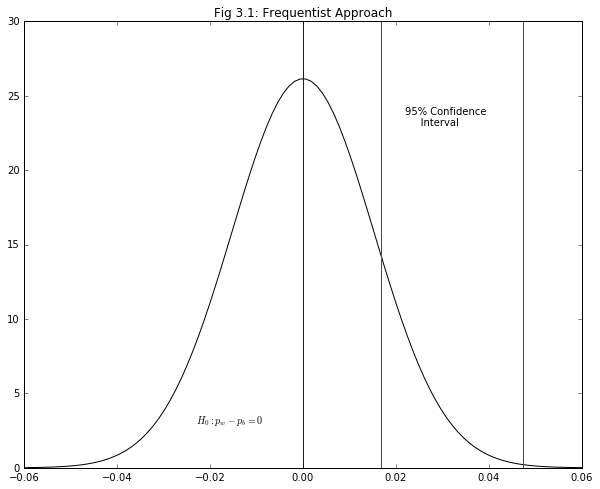

In [67]:
#Frequentist
def ztest_proportions_two_samples(r1, n1, r2, n2, one_sided=False):
    """Returns the z-statistic and p-value for a 2-sample Z-test of proportions"""
    p1 = r1/n1
    p2 = r2/n2
    p = (r1+r2)/(n1+n2)
    se = np.sqrt(1.0*p*(1-p)*(1.0/n1+1/n2))
    z = (p1-p2)/se
    p = 1-stats.norm.cdf(abs(z))
    p *= 2-one_sided
    return z, p

# 95% confidence interval
prop_diff = w_p - b_p
print('Observed difference in proportions: \t {}\n'.format(prop_diff))

z_crit = 1.96
p_hat1 = w_p*(1-w_p)/w_n
p_hat2 =  b_p*(1-b_p)/b_n
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))
z_stat, p_val = ztest_proportions_two_samples(w_r, w_n, b_r, b_n)
print('z-stat: \t {}\np-value: \t {}'.format(z_stat, p_val))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
moe = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(moe))

plt.rcParams["figure.figsize"] = (10, 8)

# Graph the Frequentist results
x = np.linspace(- 0.06, 0.06, 100, endpoint=True)
pdf = [stats.norm.pdf(_, loc=0, scale=moe) for _ in x]
plt.plot(x, pdf, 'k-')
plt.figsize = (10, 8)

_ = plt.axvline(ci_high, color='red')
_ = plt.axvline(ci_low, color='red')
_ = plt.axvline(0, color='blue')
_ = plt.text(-0.023, 3, '$H_0: p_w - p_b = 0$')
_ = plt.text(0.022, 23, '95% Confidence \n     Interval')
_ = plt.title('Fig 3.2: Frequentist Approach');

The p-value for the Bootstrap and Frequentist approach are both below the p=0.05 threshold so the null hypothesis must be rejected in favor of the alternate hypothesis, that the perception of race based on the name of the resume does have an effect as to whether an applicant will have a call back.

The null hypothersis expects rate_w - rate_b = 0, but figure 3.2 shows that the lower cut-off of the 95% confidence interval is 1.68%, well above 0%.  Figure 3.1 shows that after 10000 bootstrap samples, the greatest difference between success rates is 2.96%, well below the observed difference of 3.2%.

In can be concluded that for samples taken in a similar fashion from the same population, at least 95% of the time, the difference in proportions will not be as great as the observations seen here.

Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

There may be a correlation between years of experience and call back rates.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  del sys.path[0]


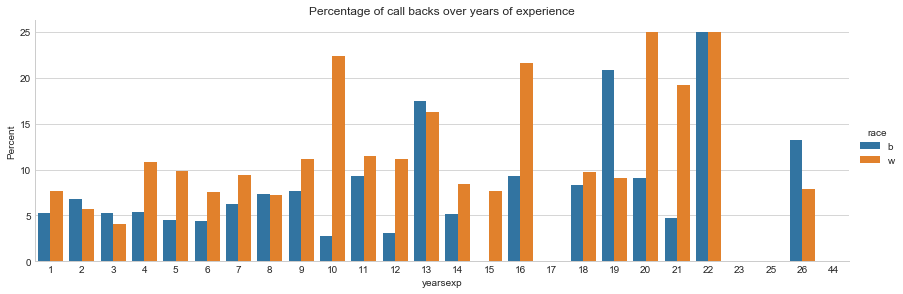

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns


np.random.seed(42)


data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

subset = data.groupby(['yearsexp','race'])['call'].agg({'total':'count','calls':'sum'})
subset.head()
subset['Percent'] = subset['calls']/subset['total']*100
subset.reset_index(inplace=True)
#print(subset)
sns.set_style("whitegrid")

_ = sns.factorplot(x='yearsexp', y='Percent', hue='race', data=subset, kind='bar', size=4, aspect=3)
# ax = sns.barplot(x='yearsexp', y='Percent', hue='race', data=subset)
_ = plt.title('Percentage of call backs over years of experience')
#ax.set(xlim=(0,50))


Analysis
After looking at a years of experience breakdown of race and call back percentage, it looks like there are age periods (7 out of 22) where the black call back rate either exceeds or matches the white call back rate.  So based on years of experience, 31% of the time, blacks were called back more.